In [1]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models

In [1]:
f = open("images/sino0.txt", 'r')
line = f.read()
print(line)
f.close

   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	  -0.0000000e+00	  -0.0000000e+00	  -0.0000000e+00	   1.0000000e+00	  -0.0000000e+00	   1.0000000e+00	  -0.0000000e+00	   1.0000000e+00	  -0.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+

<function TextIOWrapper.close()>

In [2]:
import numpy as np
metal1_img = np.zeros((256,360))
k = 0
l = 0
for i, j in enumerate(line):
    if j == '\t':
        metal1_img[k,l] = float(line[i-14:i])
        k = k+1
        if k == 256:
            k = 0
            l = l+1

<function matplotlib.pyplot.colorbar(mappable=None, cax=None, ax=None, **kw)>

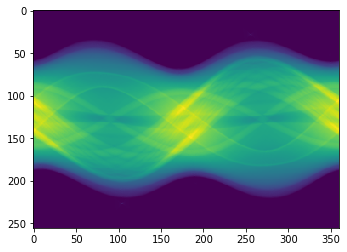

In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np

plt.imshow(metal1_img)
plt.colorbar

In [5]:
metal1_img.shape

(256, 360)

In [6]:
for i in range(256):
    if min(metal1_img[i]) < 0:
        print("x")
max(metal1_img[100])

300.0

In [7]:
result_img = metal1_img
window_size = 9

In [27]:
get_ipython().run_line_magic('matplotlib', 'inline')
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly as py
import plotly.graph_objs as go
import requests
from keras.layers import *
from keras.models import *
from keras.callbacks import *
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
model = Sequential() # Sequeatial Model 
model.add(LSTM(640, input_shape=(1, 9))) # (timestep, feature) 
model.add(Dense(300)) # output = 1 
model.compile(loss='mean_squared_error', optimizer='adam') 
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 640)               1664000   
_________________________________________________________________
dense_2 (Dense)              (None, 300)               192300    
Total params: 1,856,300
Trainable params: 1,856,300
Non-trainable params: 0
_________________________________________________________________


In [38]:
k = 0
for i in range(256-window_size-1):
    for j in range(30):
        if 0 in result_img[i:i+1+window_size,j]:
            z=0
        else:
            if 300 in result_img[i:i+1+window_size,j]:
                z = 0
            else:
                k = k+1
train_data = np.zeros((k,1,window_size))
result_data = np.zeros((k,1))

In [39]:
k = 0
for i in range(256-window_size-1):
    for j in range(30):
        if 0 in result_img[i:i+1+window_size,j]:
            z=0
        else:
            if 300 in result_img[i:i+1+window_size,j]:
                z = 0
            else:
                for w in range(window_size):
                    train_data[k][0][w] = result_img[i+w,j]
                result_data[k,0] = int(result_img[i+window_size,j])
                k = k+1
print(train_data.shape)
print(result_data.shape)

model.fit(train_data, result_data, epochs=10)

(4842, 1, 9)
(4842, 1)
Epoch 1/10


ValueError: Creating variables on a non-first call to a function decorated with tf.function.

In [22]:
train_data.shape

(4842, 9)

In [20]:
l = 0
for i in range(256-window_size-1):
    for j in range(30):
        if result_img[i+window_size,j] == 300:
            test_data = np.zeros((1,window_size,1,1))
            for w in range(window_size):
                test_data[0,w,0,0] = result_img[i+w,j]
            prediction = model.predict(test_data)
            result_img[i+window_size,j] = np.where(prediction[0]==max(prediction[0]))[0][0]
            print(np.where(prediction[0]==max(prediction[0]))[0][0])
            l = l+1

    k = 0
    z = 0

    for i in range(256-window_size-1):
        for j in range(30):
            if 0 in result_img[i:i+window_size+1,j]:
                z=0
            else:
                if 300 in result_img[i:i+window_size+1,j]:
                    z = 0
                else:
                    k = k+1
    train_data = np.zeros((k,window_size,1,1))
    result_data = np.zeros((k,1))
            
    k = 0

    for i in range(256-window_size-1):
        for j in range(30):
            if 0 in result_img[i:i+1+window_size,j]:
                z=0
            else:
                if 300 in result_img[i:i+1+window_size,j]:
                    z = 0
                else:
                    for w in range(window_size):
                        train_data[k,w,0,0] = result_img[i+w,j]
                    result_data[k,0] = int(result_img[i+window_size,j])
                    k = k+1
    model.fit(train_data, result_data, epochs=10)

Epoch 1/10


ValueError: in user code:

    C:\Users\forev\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\training.py:571 train_function  *
        outputs = self.distribute_strategy.run(
    C:\Users\forev\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\distribute\distribute_lib.py:951 run  **
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\forev\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\distribute\distribute_lib.py:2290 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\forev\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\distribute\distribute_lib.py:2649 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\forev\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\training.py:531 train_step  **
        y_pred = self(x, training=True)
    C:\Users\forev\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\base_layer.py:886 __call__
        self.name)
    C:\Users\forev\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\input_spec.py:180 assert_input_compatibility
        str(x.shape.as_list()))

    ValueError: Input 0 of layer sequential is incompatible with the layer: expected ndim=3, found ndim=4. Full shape received: [None, 9, 1, 1]


<function matplotlib.pyplot.colorbar(mappable=None, cax=None, ax=None, **kw)>

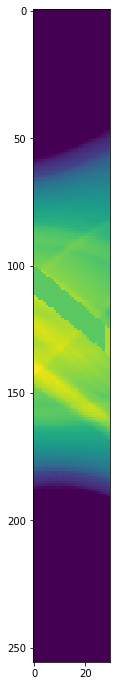

In [12]:
plt.figure(figsize=(8,12))
plt.imshow(result_img[:,0:30])
plt.colorbar

<function matplotlib.pyplot.colorbar(mappable=None, cax=None, ax=None, **kw)>

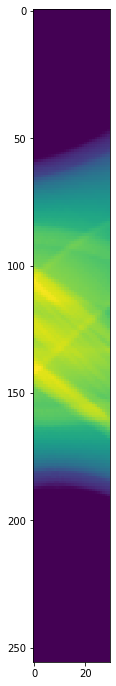

In [16]:
plt.figure(figsize=(8,12))
plt.imshow(metal0_img[:,0:30])
plt.colorbar

In [13]:
f = open("images/sino0.txt", 'r')
line = f.read()
print(line)
f.close

   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	  -0.0000000e+00	  -0.0000000e+00	  -0.0000000e+00	   1.0000000e+00	  -0.0000000e+00	   1.0000000e+00	  -0.0000000e+00	   1.0000000e+00	  -0.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+

<function TextIOWrapper.close()>

In [14]:
import numpy as np
metal0_img = np.zeros((256,360))
k = 0
l = 0
for i, j in enumerate(line):
    if j == '\t':
        metal0_img[k,l] = float(line[i-14:i])
        k = k+1
        if k == 256:
            k = 0
            l = l+1

<function matplotlib.pyplot.colorbar(mappable=None, cax=None, ax=None, **kw)>

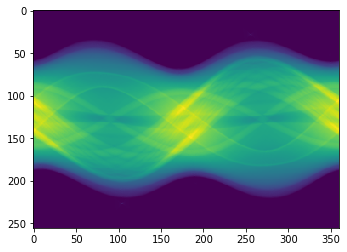

In [15]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np

plt.imshow(metal0_img)
plt.colorbar

In [ ]:
# plt.imshow(result_img)
# plt.colorbar
# plt.axis('off'), plt.xticks([]), plt.yticks([])
# plt.tight_layout()
# plt.subplots_adjust(left = 0, bottom = 0, right = 1, top = 1, hspace = 0, wspace = 0)
# plt.savefig('images/CNN_Metal3_3by3_training_img.png', bbox_inches = 'tight', pad_inches=0, dpi=100)

In [ ]:
# np.savetxt('images/CNN_Metal3_3by3_training_txt.txt', result_img)